### 朴素贝叶斯分类器实战（代码实现）
#### 利用朴素贝叶斯分类器解决 MNIST 手写体数字识别问题

1. 在 Python 中导入相应库

In [1]:
!mkdir -p ~/.keras/datasets
!cp ./mnist.npz ~/.keras/datasets/mnist.npz

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


import warnings
warnings.filterwarnings("ignore")

# numpy库
import numpy as np

# tensorflow库中的mnist数据集
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# sklearn 库中的BernoulliNB
from sklearn.naive_bayes import BernoulliNB

# 绘图工具库plt
import matplotlib.pyplot as plt

cp: ./mnist.npz: No such file or directory


2. 读取 MNIST 训练集和测试集

In [3]:
print("读取数据中 ...")

# 载入数据
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 将图像数据变形为一维的784位的向量
train_images = train_images.reshape(len(train_images),784)
test_images =  test_images.reshape(len(test_images),784)

print('读取完毕!')
print(f'训练集中图片数：{len(train_images)}')
print(f'测试集中图片数：{len(test_images)}')

读取数据中 ...
读取完毕!
训练集中图片数：60000
测试集中图片数：10000


3. 根据 MNIST 训练集训练朴素贝叶斯分类器

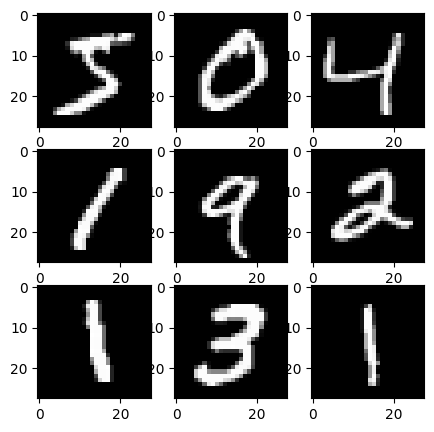

In [9]:
def plot_images(imgs):
    """绘制几个样本图片
    :param show: 是否显示绘图
    :return:
    """
    sample_num = min(9, len(imgs))
    img_figure = plt.figure(1)
    img_figure.set_figwidth(5)
    img_figure.set_figheight(5)
    for index in range(0, sample_num):
        ax = plt.subplot(3, 3, index + 1)
        ax.imshow(imgs[index].reshape(28, 28), cmap='gray')
        ax.grid(False)
    plt.margins(0, 0)
    plt.show()


plot_images(train_images)  

4. 根据训练出的分类器对 MNIST 测试集中的图片进行识别，得到预测值

In [4]:
print("初始化并训练贝叶斯模型...")

# 定义 朴素贝叶斯模型
classifier_BNB = BernoulliNB()

# 训练模型
classifier_BNB.fit(train_images,train_labels)

print('训练完成!')

初始化并训练贝叶斯模型...
训练完成!


5. 将测试图片的预测值与实际值相比较，计算并输出分类器的正确率。

In [6]:
print("测试训练好的贝叶斯模型...")

# 分类器在测试集上的预测值
test_predict_BNB = classifier_BNB.predict(test_images)
print(test_predict_BNB)
print("测试完成!")

测试训练好的贝叶斯模型...
[7 2 1 ... 9 8 6]
测试完成!


In [16]:
# 计算准确率
accuracy = classifier_BNB.score(test_images, test_labels)

print("贝叶斯分类模型在训练集上的准确率为 :",classifier_BNB.score(train_images,train_labels))
print('贝叶斯分类模型在测试集上的准确率为 :',accuracy)

贝叶斯分类模型在训练集上的准确率为 : 0.83125
贝叶斯分类模型在测试集上的准确率为 : 0.8413


6. 对实验结果进行分析比较，列出 0-9 不同数字识别的准确率，比较其差异。

In [8]:
# 字典记录每个类别的样本的个数，例如 {0：100} 即 数字为 0 的图片有 100 张 
class_num = {}
# 每个类别预测为 0-9 类别的个数，
predict_num = []
# 每个类别预测的准确率
class_accuracy = {}

for i in range(10):
    # 找到类别是 i 的下标
    class_is_i_index = np.where(test_labels == i)[0]
    # 统计类别是 i 的个数
    class_num[i] = len(class_is_i_index)

    # 统计类别 i 预测为 0-9 各个类别的个数
    predict_num.append(
        [sum(test_predict_BNB[class_is_i_index] == e) for e in range(10)])

    # 统计类别 i 预测的准确率
    class_accuracy[i] = round(predict_num[i][i] / class_num[i], 3) * 100

    print("数字 %s 的样本个数：%4s，预测正确的个数：%4s，准确率：%.4s%%" % (
    i, class_num[i], predict_num[i][i], class_accuracy[i]))

数字 0 的样本个数： 980，预测正确的个数： 887，准确率：90.5%
数字 1 的样本个数：1135，预测正确的个数：1085，准确率：95.6%
数字 2 的样本个数：1032，预测正确的个数： 852，准确率：82.6%
数字 3 的样本个数：1010，预测正确的个数： 844，准确率：83.6%
数字 4 的样本个数： 982，预测正确的个数： 795，准确率：81.0%
数字 5 的样本个数： 892，预测正确的个数： 627，准确率：70.3%
数字 6 的样本个数： 958，预测正确的个数： 851，准确率：88.8%
数字 7 的样本个数：1028，预测正确的个数： 871，准确率：84.7%
数字 8 的样本个数： 974，预测正确的个数： 758，准确率：77.8%
数字 9 的样本个数：1009，预测正确的个数： 843，准确率：83.5%


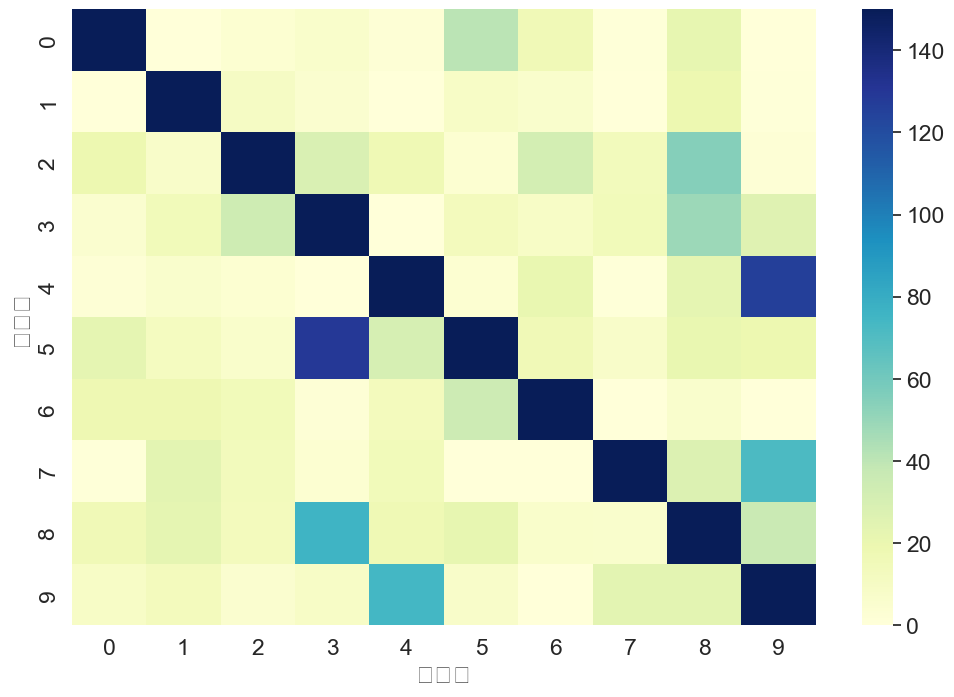

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (12, 8)}, font_scale=1.5)


np.random.seed(0)
uniform_data = predict_num
ax = sns.heatmap(uniform_data, cmap='YlGnBu', vmin=0, vmax=150)
ax.set_xlabel('真实值')
ax.set_ylabel('预测值')
plt.show()

7. 我们看看真实标签为 9，但是预测为 4 的 错认的照片。

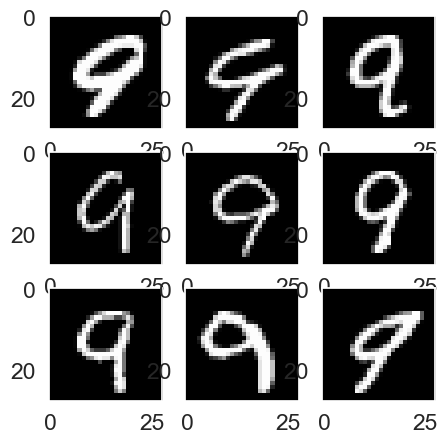

In [26]:
def get_imgs(images, true_labels, predict_labels, true_label,
             predict_label):
    """
    从全部图片中按真实标签和预测标签筛选出图片
    :param images: 一组图片
    :param true_labels: 每张图片的标签
    :param predict_labels: 模型预测的每张图片的标签
    :param true_label: 希望取得的图片的真实标签
    :param predict_label: 希望取得的图片的预测标签
    :return: 
    """
    # 所有类别为 true_label 的样本的 index 值
    true_label_index = set(np.where(true_labels == true_label)[0])
    # 所有预测类别为 predict_label 的样本的 index 值
    predict_label_index = set(np.where(predict_labels == predict_label)[0])
    # 取交集，即为真实类别为 true_label， 预测结果为 predict_label 的样本的 index 值
    res = list(true_label_index & predict_label_index)
    return images[res]
imgs = get_imgs(test_images, test_labels, test_predict_BNB, 9, 4)
plot_images(imgs)